In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/content/your_data.csv')

In [17]:
# Feature Engineering
numerical_features=['systolic','fasting blood sugar','AST','Gtp','hemoglobin','serum creatinine','age','height(cm)','triglyceride']

# Interaction Terms
for i in range(len(numerical_features) - 1):
    for j in range(i + 1, len(numerical_features)):
        interaction_term = f"{numerical_features[i]}_{numerical_features[j]}"
        df[interaction_term] = df[numerical_features[i]] * df[numerical_features[j]]

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[numerical_features])
poly_features = [f"poly_{i}" for i in range(X_poly.shape[1])]
df_poly = pd.DataFrame(X_poly, columns=poly_features)
df = pd.concat([df, df_poly], axis=1)




In [18]:
df.head()

,Unnamed: 0,systolic,fasting blood sugar,AST,dental caries,Gtp,hemoglobin,serum creatinine,age,height(cm),...,poly_44,poly_45,poly_46,poly_47,poly_48,poly_49,poly_50,poly_51,poly_52,poly_53
0,0,135,94,22,0,27,16.5,1.0,55,165,...,1.00,55.0,165.0,300.0,3025.0,9075.0,16500.0,27225.0,49500.0,90000.0
1,1,146,147,27,1,37,16.2,1.1,70,165,...,1.21,77.0,181.5,60.5,4900.0,11550.0,3850.0,27225.0,9075.0,3025.0
2,2,118,79,27,0,53,17.4,0.8,20,170,...,0.64,16.0,136.0,157.6,400.0,3400.0,3940.0,28900.0,33490.0,38809.0
3,3,131,91,20,1,30,15.9,1.0,35,180,...,1.00,35.0,180.0,203.0,1225.0,6300.0,7105.0,32400.0,36540.0,41209.0
4,4,121,91,19,0,17,15.4,0.8,30,165,...,0.64,24.0,132.0,69.6,900.0,4950.0,2610.0,27225.0,14355.0,7569.0


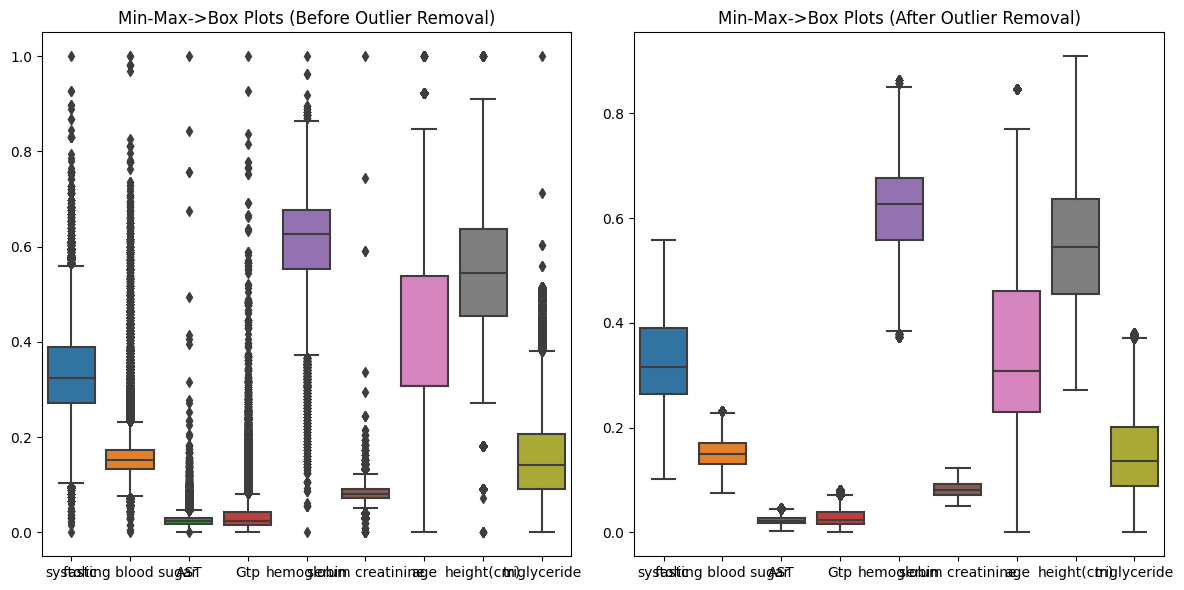

In [19]:
# Normalization with miin max then remove outliers
df1=df
# Min-Max Scaling
scaler = MinMaxScaler()
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

# Outlier Removal
plt.figure(figsize=(12, 6))

# Original box plots
plt.subplot(1, 2, 1)
sns.boxplot(data=df1[numerical_features])
plt.title('Min-Max->Box Plots (Before Outlier Removal)')

# Calculate the IQR for numerical features
Q1 = df1[numerical_features].quantile(0.25)
Q3 = df1[numerical_features].quantile(0.75)
IQR = Q3 - Q1
iqr_multiplier = 1.5

# Create a mask for outliers
outliers_mask = ~((df1[numerical_features] < (Q1 - iqr_multiplier * IQR)) | (df1[numerical_features] > (Q3 + iqr_multiplier * IQR)))

# Apply the mask to the DataFrame
df_no_outliers1 = df1[outliers_mask.all(axis=1)]

# Box plots after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers1[numerical_features])
plt.title('Min-Max->Box Plots (After Outlier Removal)')

plt.tight_layout()
plt.show()

**Outliers Removal**

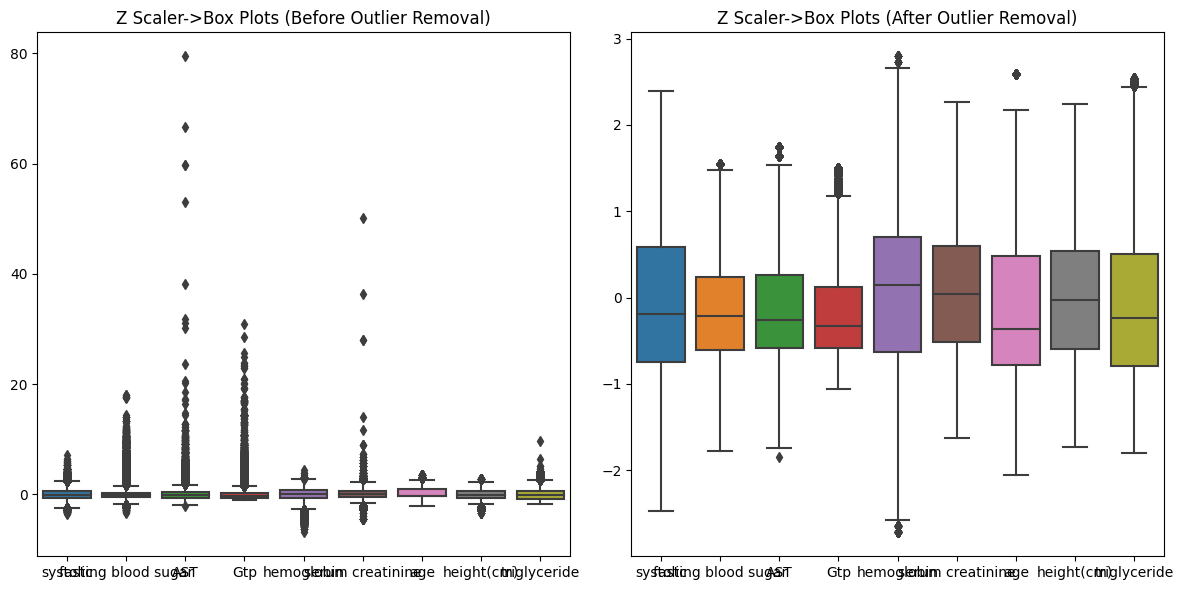

In [20]:

#Normalization with Z-Score Standardization then remove outliers
df2=df
scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
# Outlier Removal
plt.figure(figsize=(12, 6))

# Original box plots
plt.subplot(1, 2, 1)
sns.boxplot(data=df2[numerical_features])
plt.title('Z Scaler->Box Plots (Before Outlier Removal)')

# Calculate the IQR for numerical features
Q1 = df2[numerical_features].quantile(0.25)
Q3 = df2[numerical_features].quantile(0.75)
IQR = Q3 - Q1
iqr_multiplier = 1.5

# Create a mask for outliers
outliers_mask = ~((df2[numerical_features] < (Q1 - iqr_multiplier * IQR)) | (df2[numerical_features] > (Q3 + iqr_multiplier * IQR)))

# Apply the mask to the DataFrame
df_no_outliers2 = df2[outliers_mask.all(axis=1)]

# Box plots after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers2[numerical_features])
plt.title('Z Scaler->Box Plots (After Outlier Removal)')

plt.tight_layout()
plt.show()